In [1]:
# 基本套件
import pandas as pd
import numpy as np

# 視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns

# 設定視覺化風格
sns.set(style='whitegrid')
%matplotlib inline

# 載入資料
df = pd.read_csv('weather_data/weatherAUS.csv')

In [2]:
# 資料大小
print(f"資料筆數：{df.shape[0]} 筆")
print(f"欄位數量：{df.shape[1]} 欄")

# 欄位名稱與資料型態
df.info()

資料筆數：145460 筆
欄位數量：23 欄
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud

In [3]:
# 將 Date 欄位轉為 datetime 格式
df['Date'] = pd.to_datetime(df['Date'])

# 顯示最早與最晚日期
print("資料時間範圍：")
print(f"最早日期：{df['Date'].min().date()}")
print(f"最晚日期：{df['Date'].max().date()}")

資料時間範圍：
最早日期：2007-11-01
最晚日期：2017-06-25


In [4]:
# 顯示所有地點（不重複）
locations = df['Location'].dropna().unique()
print(f"共有 {len(locations)} 個地點：")
print(sorted(locations))

共有 49 個地點：
['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


In [5]:
# 數值欄位統計摘要
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


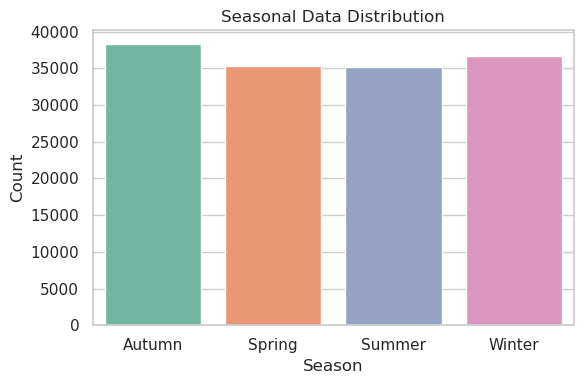

In [7]:
# 日期轉換
df['Date'] = pd.to_datetime(df['Date'])

# 建立季節欄位
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'     # 澳洲的夏季
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df['Season'] = df['Date'].dt.month.map(get_season)

# 計算各季節資料筆數
season_counts = df['Season'].value_counts().sort_index()

# 視覺化
plt.figure(figsize=(6, 4))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='Set2')
plt.title('Seasonal Data Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

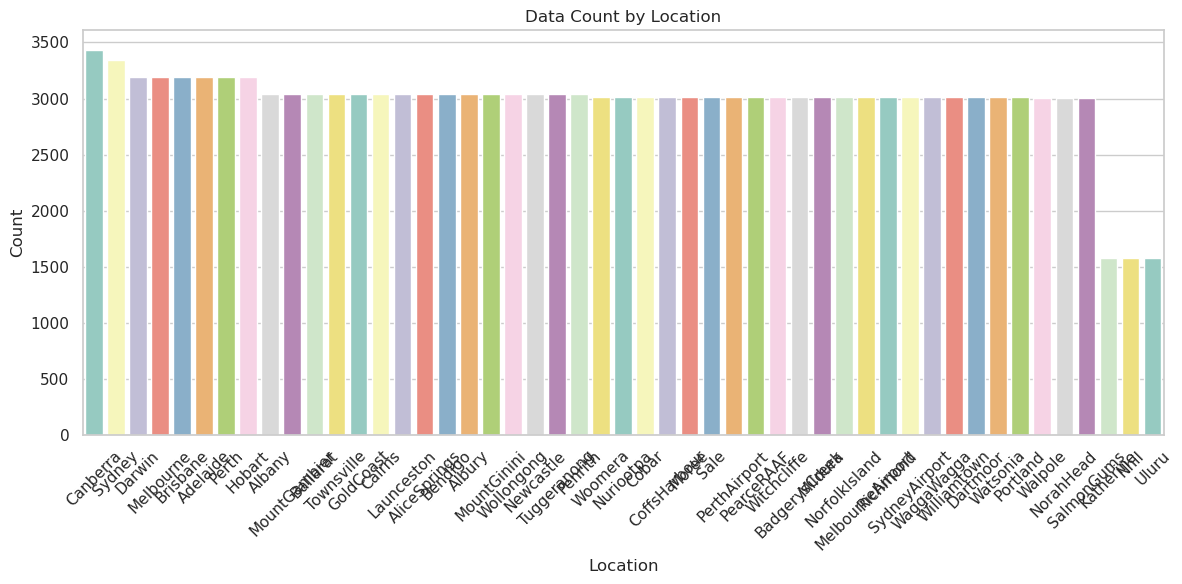

In [8]:
# 計算每個地點的資料筆數
location_counts = df['Location'].value_counts()

# 視覺化
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index[:], y=location_counts.values[:], palette='Set3')
plt.title('Data Count by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

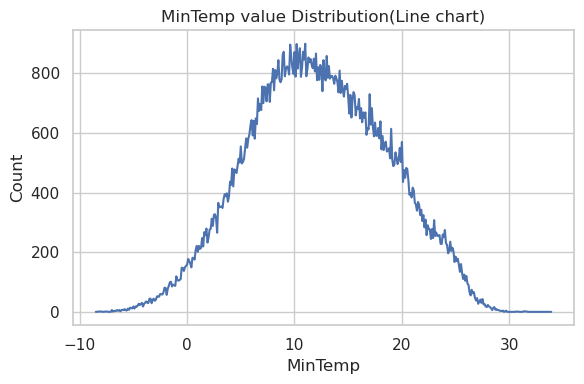

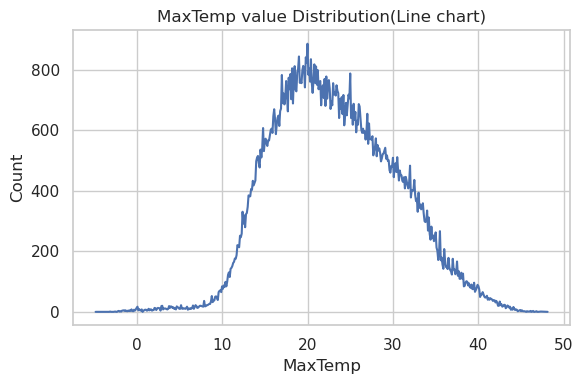

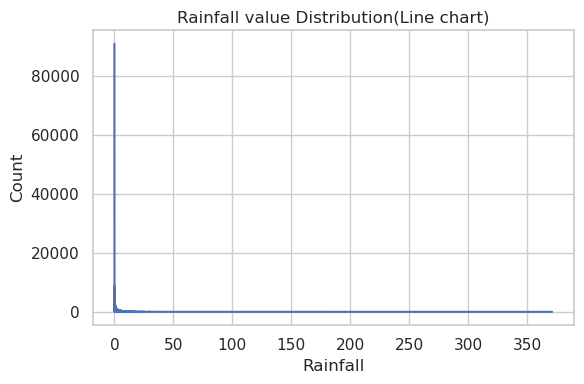

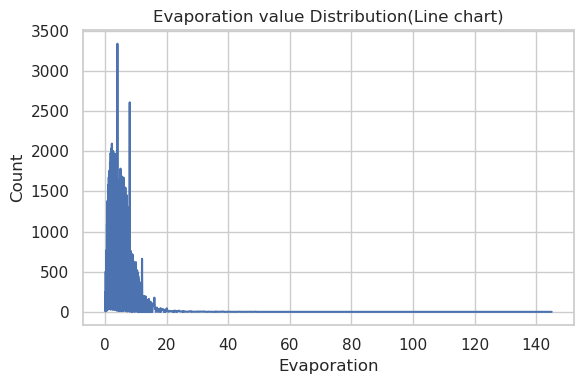

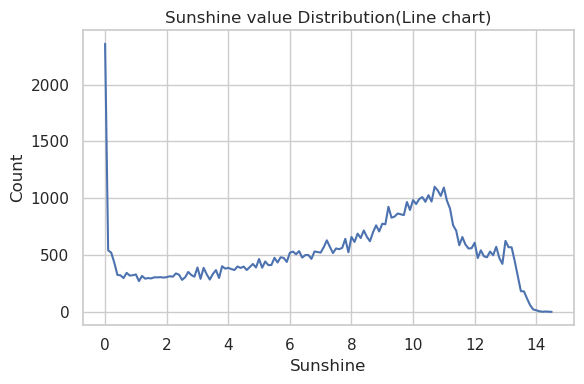

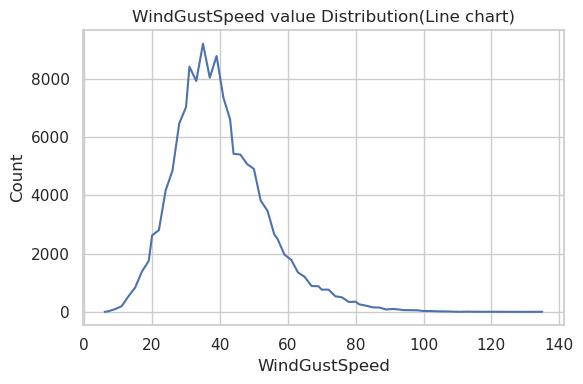

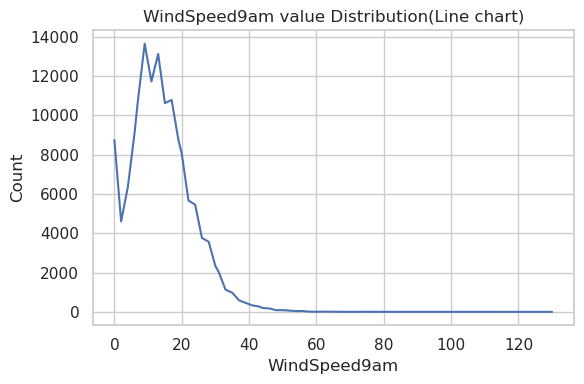

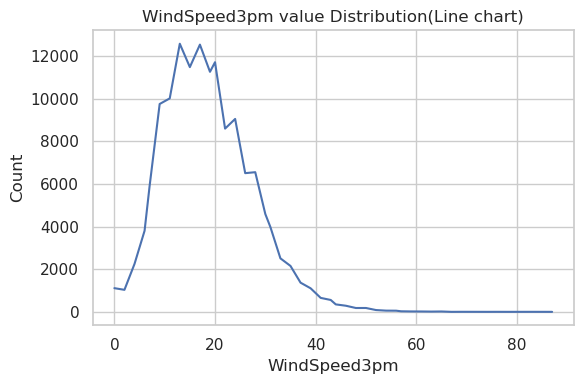

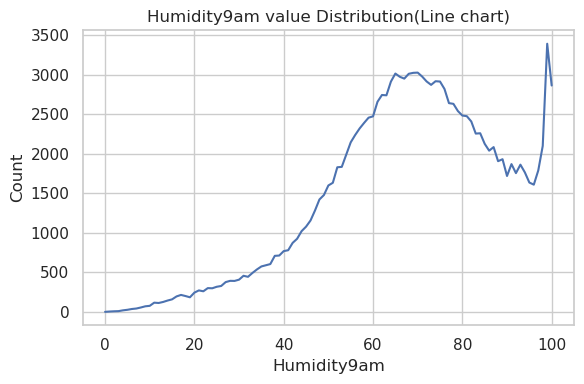

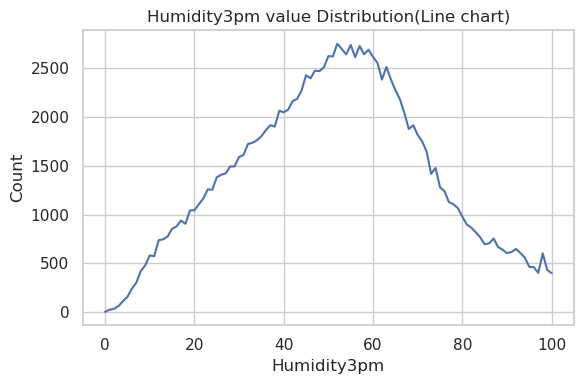

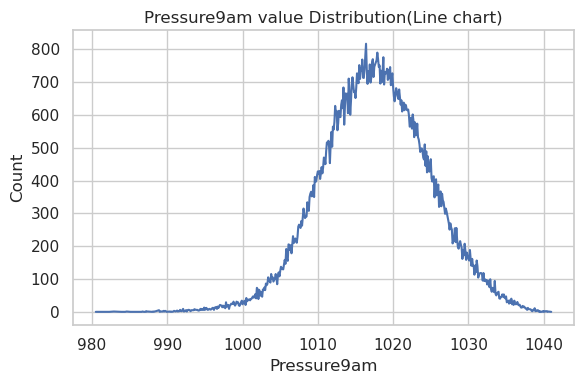

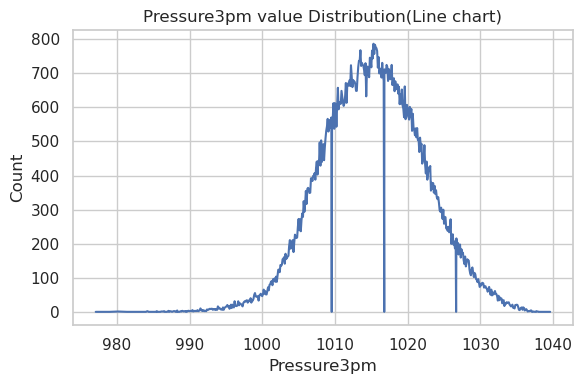

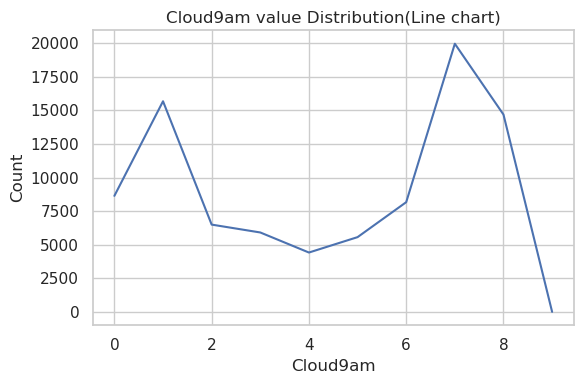

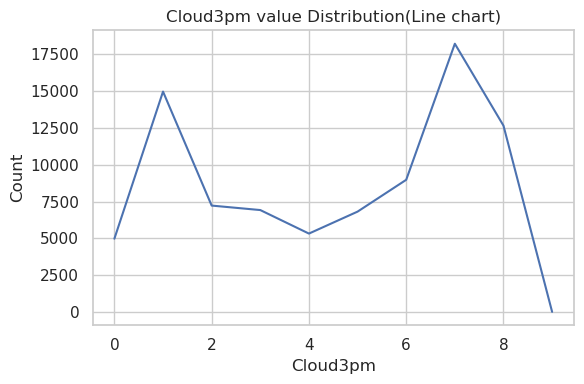

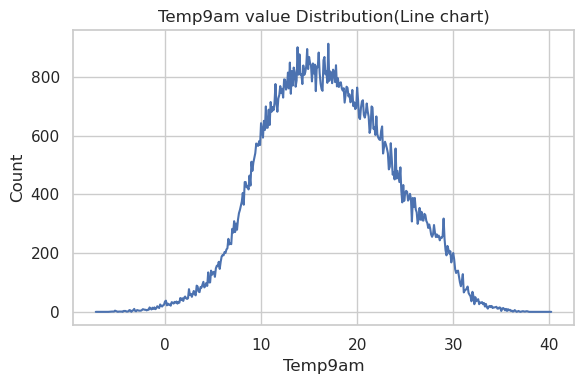

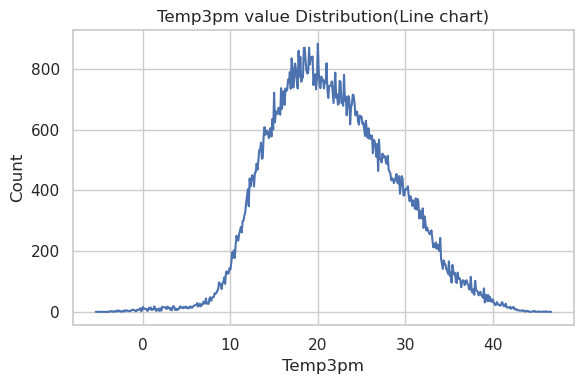

In [12]:
# 選擇要分析的數值欄位
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine','WindGustSpeed',
                'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
                'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

# 計算每個欄位的分布（用分箱方式）
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=df[col].dropna().value_counts().sort_index())
    plt.title(f'{col} value Distribution(Line chart)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [15]:
# 缺失值數量與比例
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
missing_df

,Missing Count,Missing %
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, size=10):
    corr = df.corr()
    plt.figure(figsize=(size, size))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_496/3417307222.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


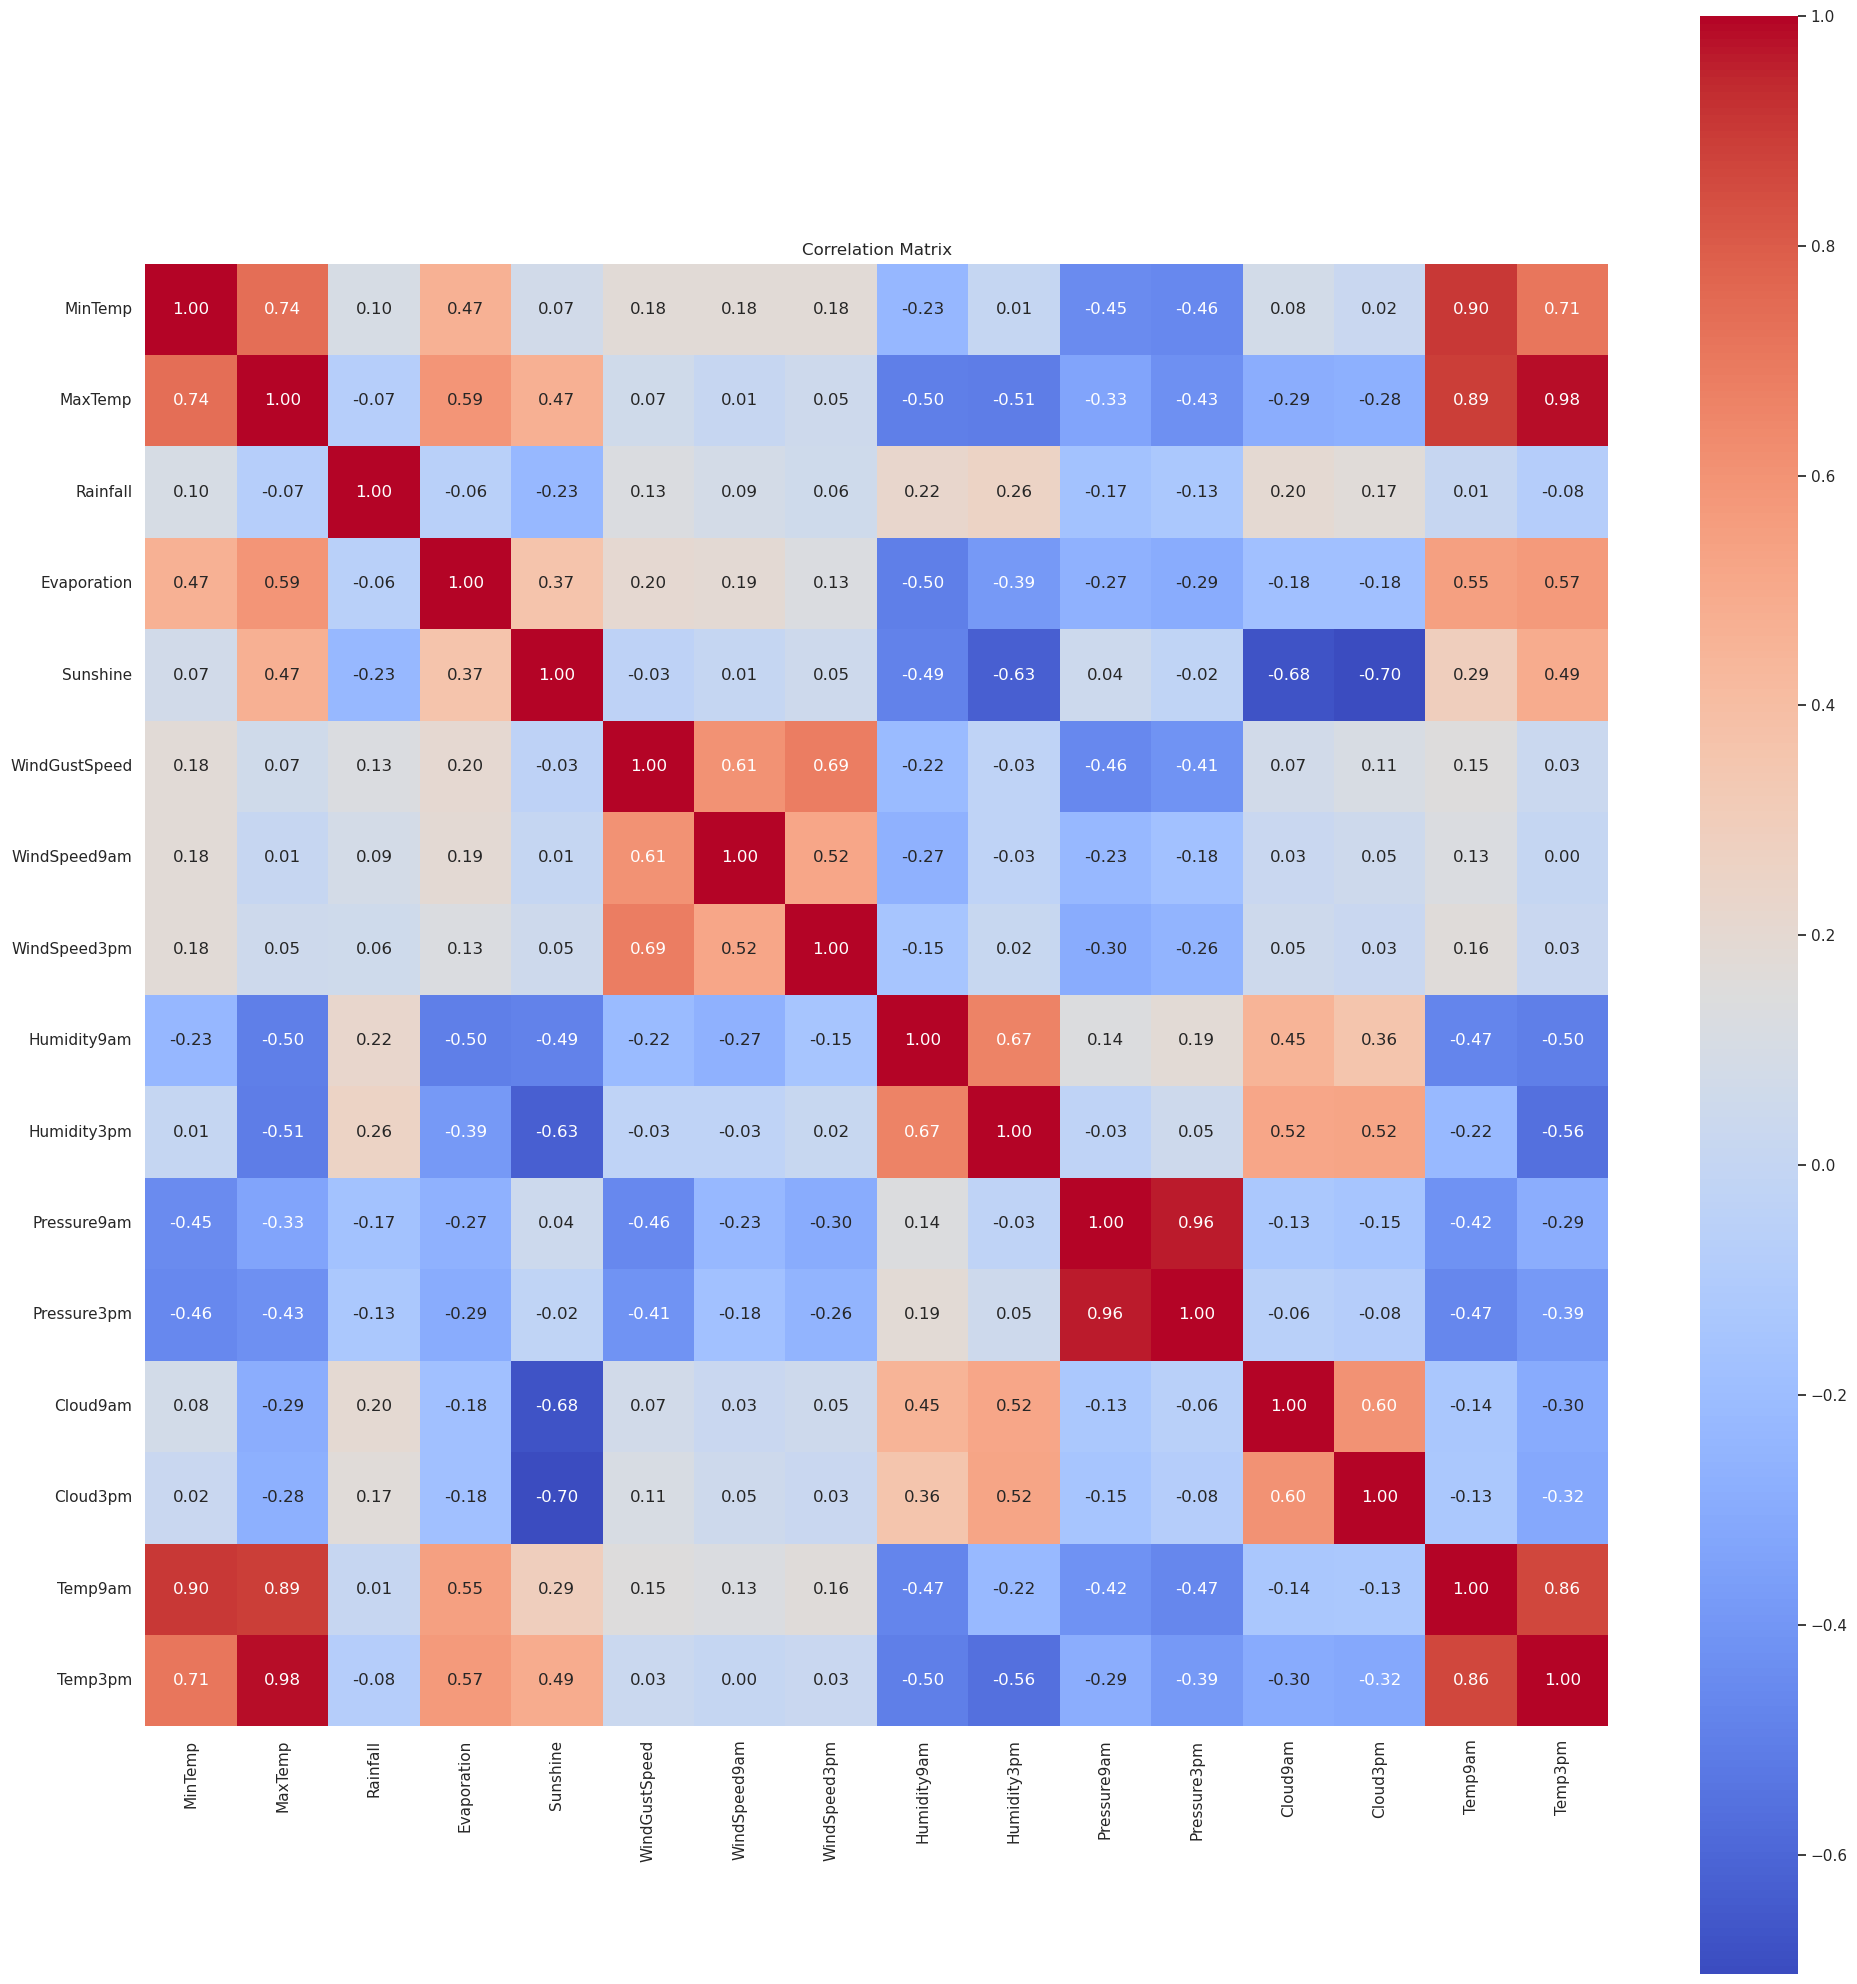

In [19]:
plotCorrelationMatrix(df, 20)

In [25]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

def plotScatterMatrix(df, width=10, height=10):
    # 選擇數值欄位（避免非數值欄位造成錯誤）
    numeric_cols = df.select_dtypes(include='number').columns

    # 畫散佈矩陣圖
    scatter_matrix(df[numeric_cols], figsize=(width, height), diagonal='kde', alpha=0.5)
    plt.suptitle('Scatter Matrix of Numeric Features', y=1.02)
    plt.show()

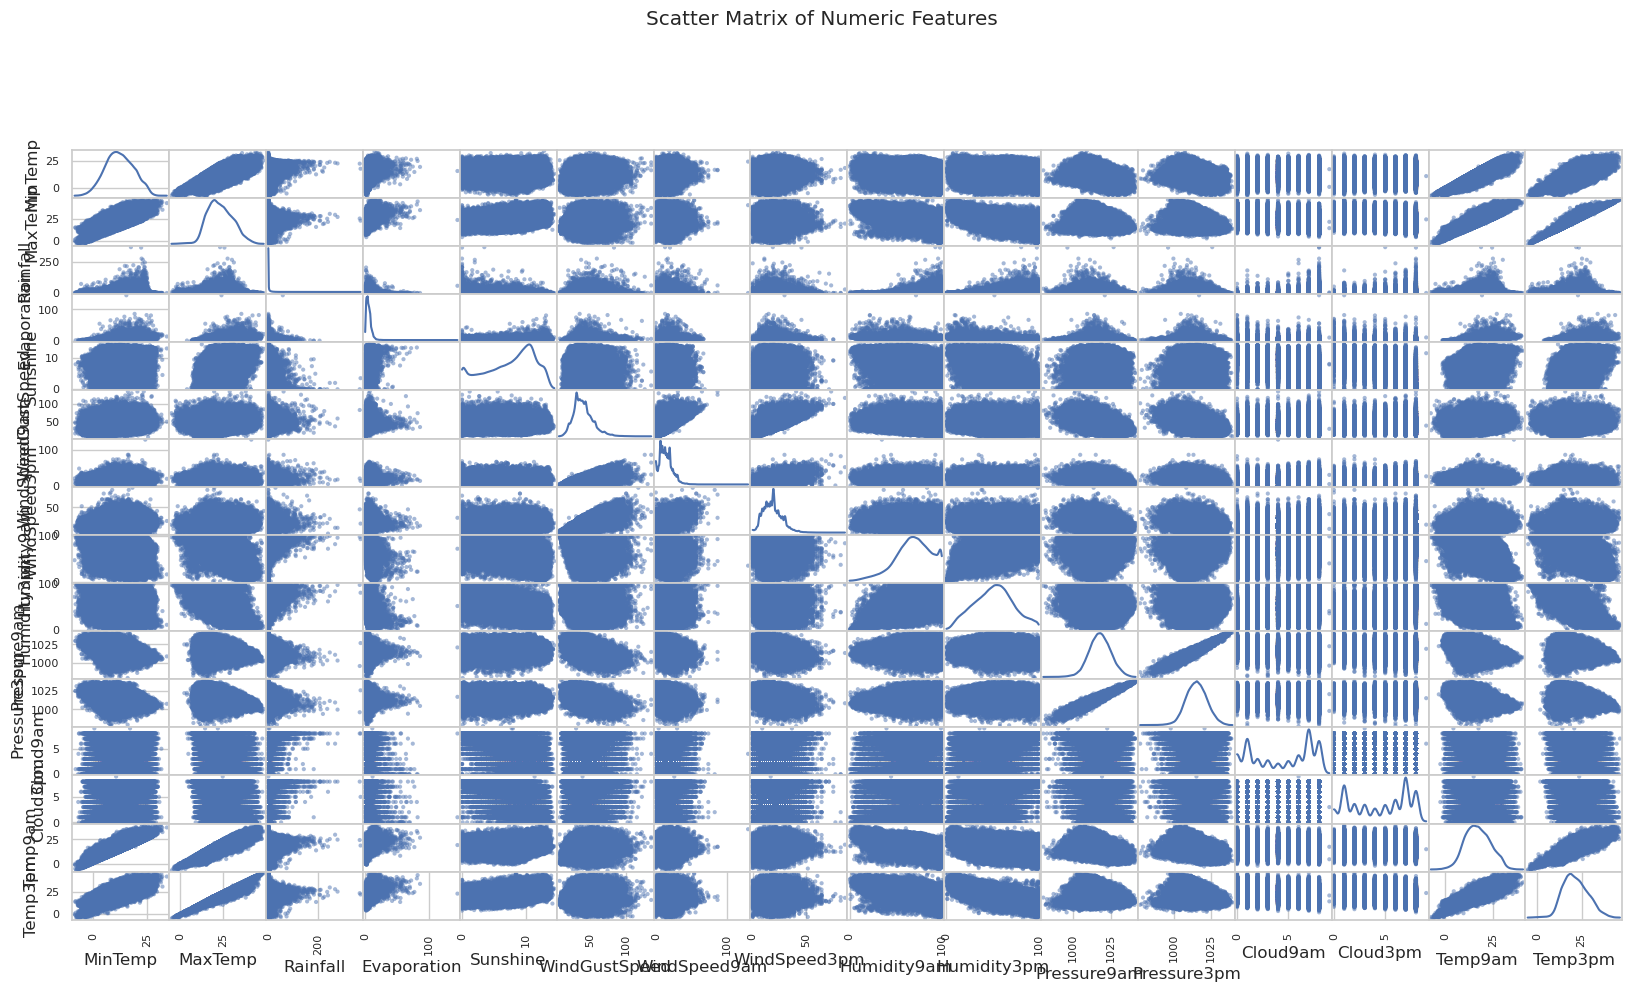

In [26]:
plotScatterMatrix(df, 20, 10)

In [27]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Season               0
dtype: int64

In [30]:
!pip install missingno


<AxesSubplot: >

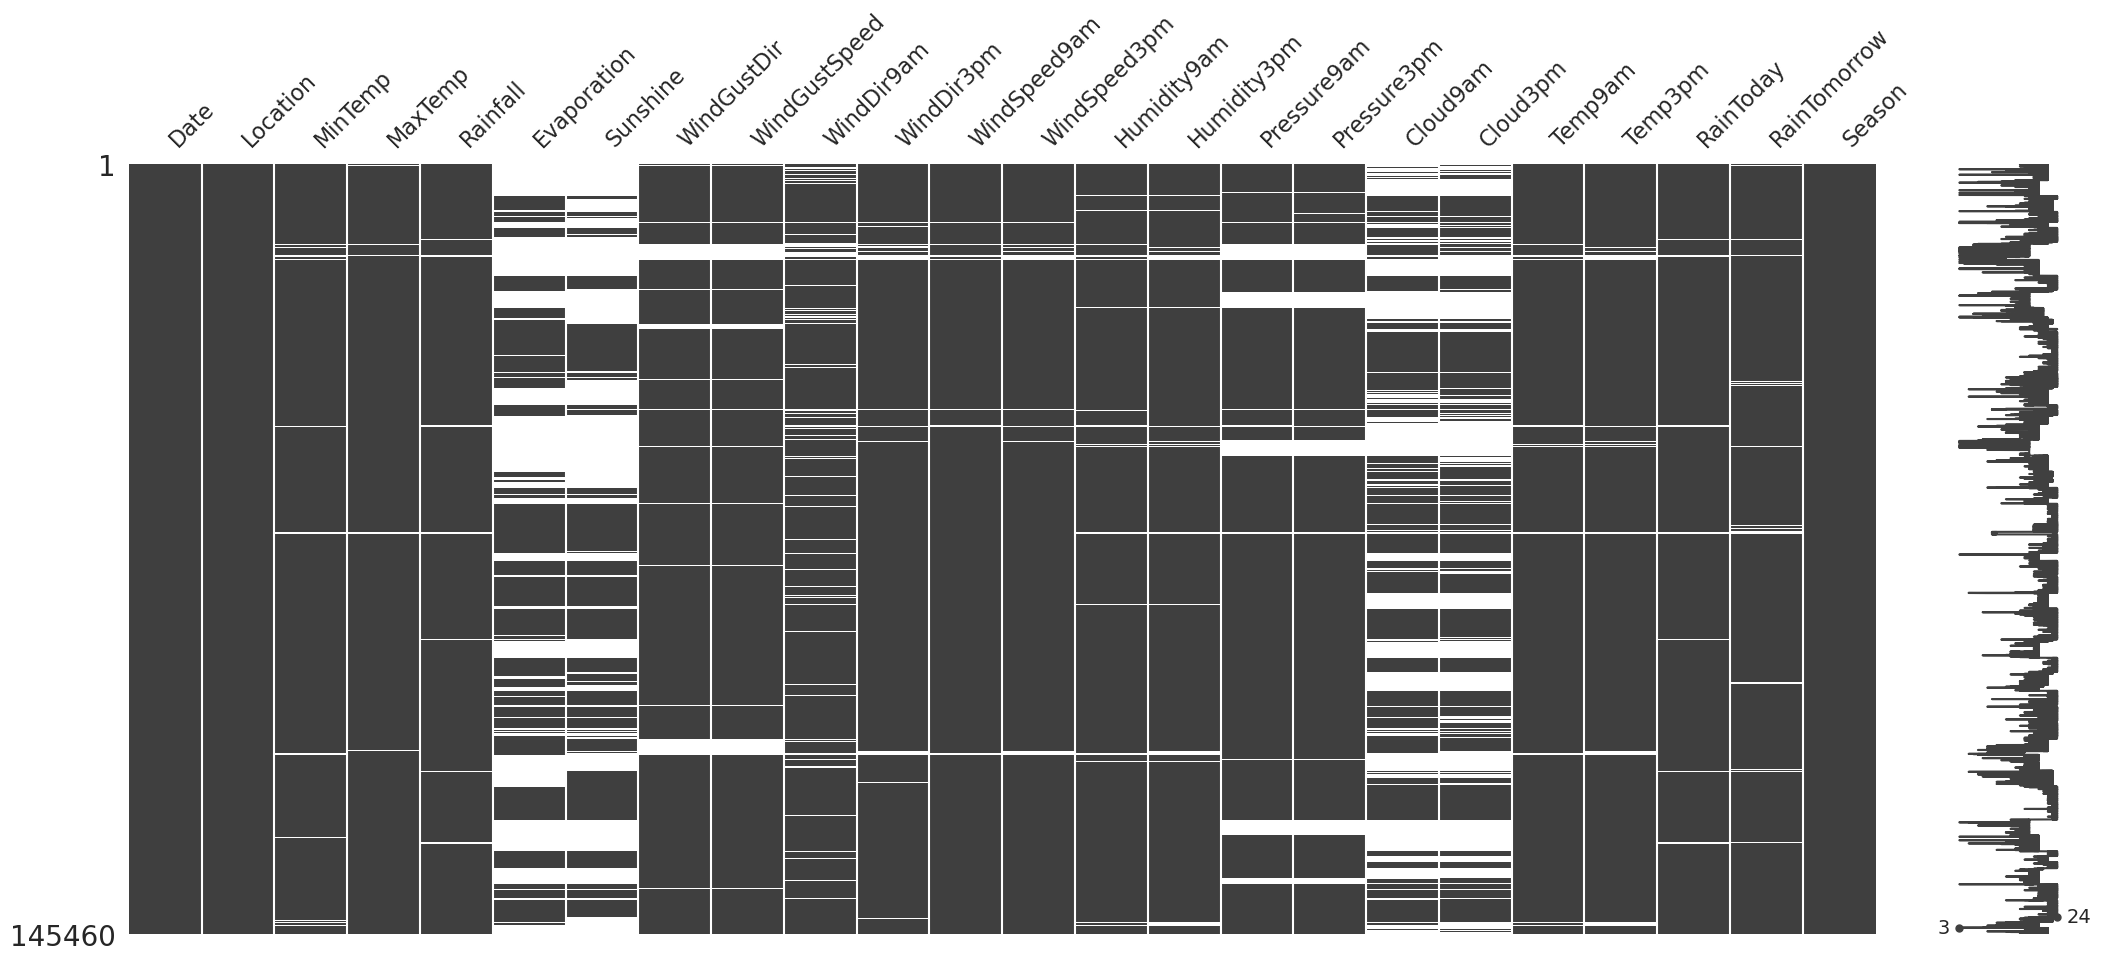

In [31]:
import missingno as msno
msno.matrix(df)

<AxesSubplot: >

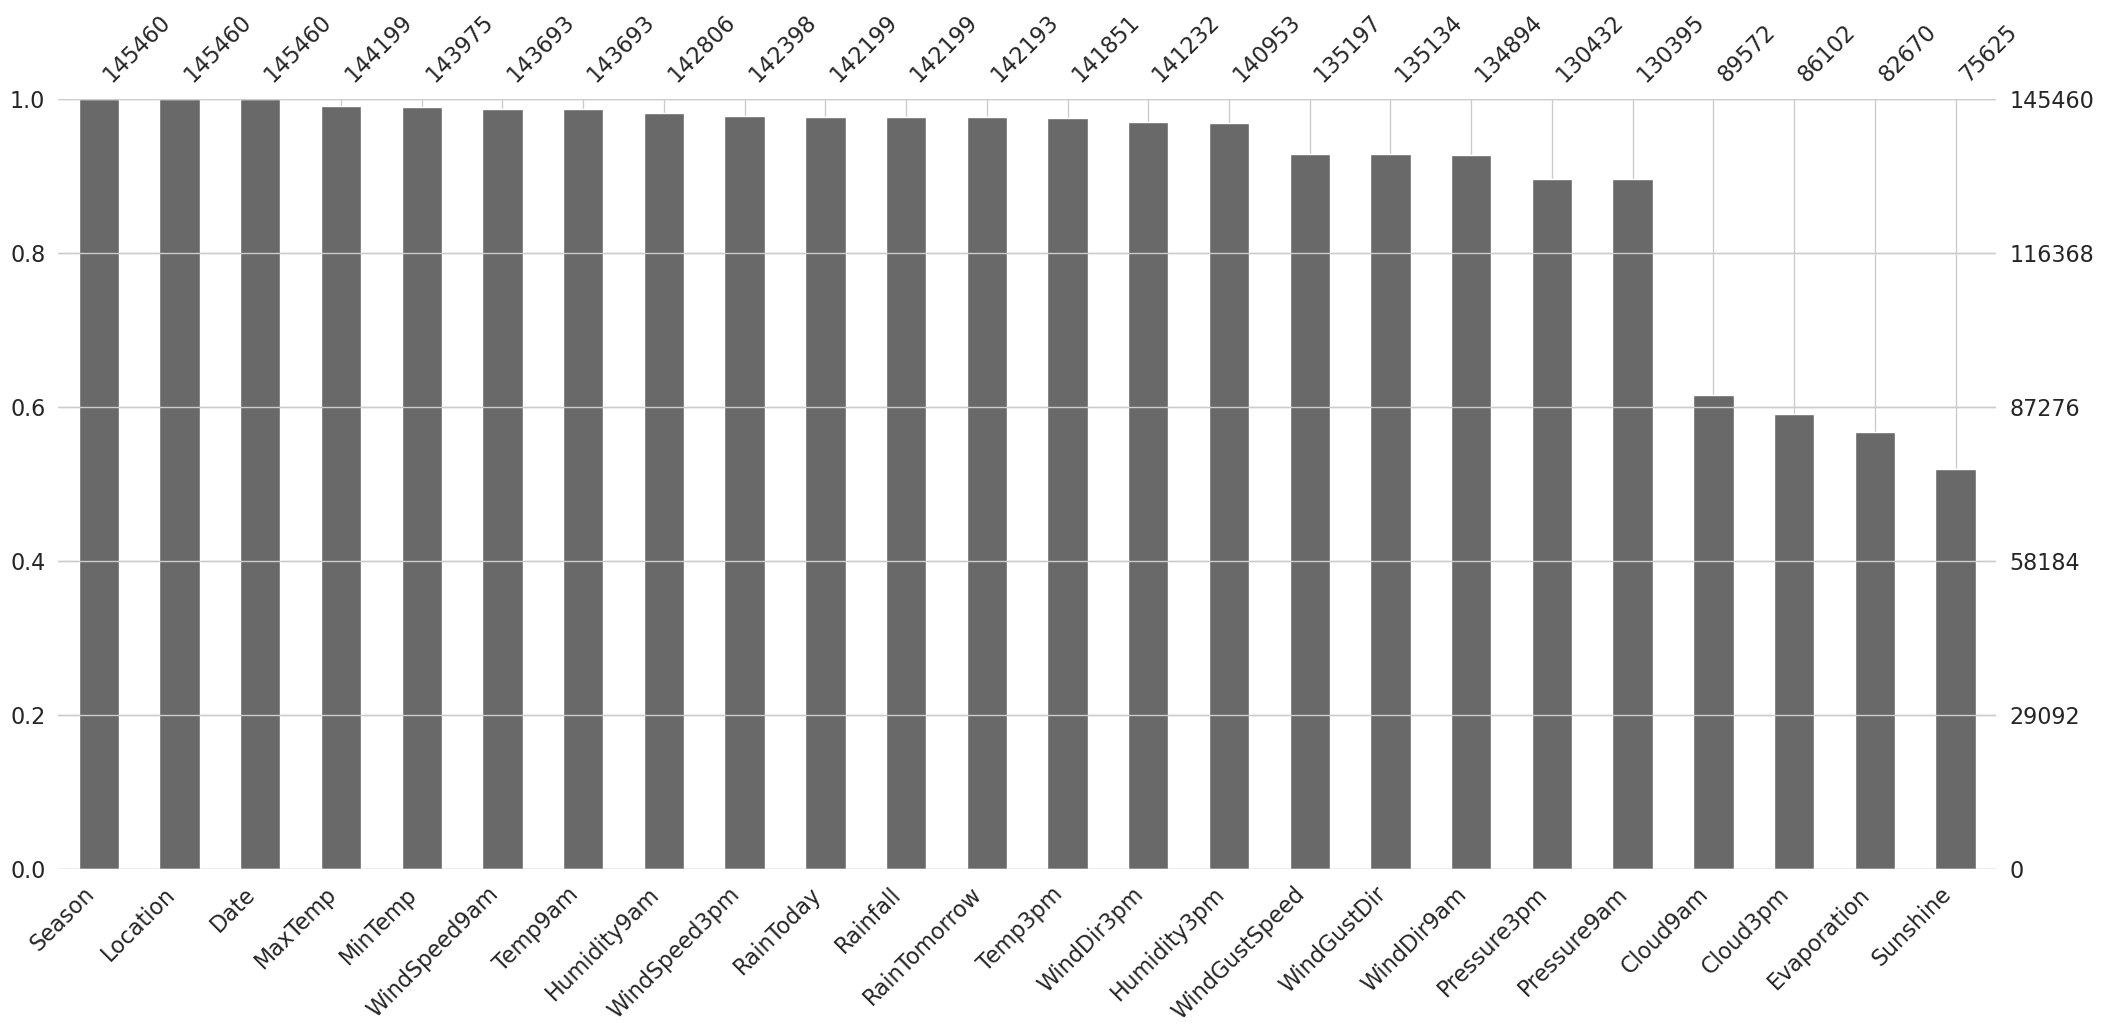

In [33]:
msno.bar(df, sort= 'descending')